# 1. Import Library

In [6]:
import time
import torch
from Dataloader import SnSpectrumLoader
# import torch.utils.data as data
from torch.utils.data import _utils
import pylab as pl
import numpy as np

# 2. Data loading and timing

In [8]:
# Initialize path
training_data_path = '../../1.1 Dataset Simulation/1.1.3 Dataset/1.1.3.1 Training Set/(3) One environment training set/SW_Training_Freq50-200Hz_01.sim'
testing_data_path = '../../1.1 Dataset Simulation/1.1.3 Dataset/1.1.3.2 Test Set/(1) Sound speed profile shift'

# Training data set loading
# mtl_cnn
t_start_train_mtl_cnn = time.time()
dataset_tarin_mtl_cnn = SnSpectrumLoader(file_path=training_data_path, length_freq=151,
                           SNR_range=[10, 15], Sr=np.array([10]),
                           Sd=np.array([10]), SNR=10, i_file=0, run_mode='train',
                           model='mtl_cnn')
t_end_train_mtl_cnn = time.time()
print('Loading %d sources for training mtl-cnn need: %fs' % (len(dataset_tarin_mtl_cnn), t_end_train_mtl_cnn - t_start_train_mtl_cnn))
# Compressed-feture cnns (mtl_unet, xception)
t_start_train_cf = time.time()
dataset_tarin_cf = SnSpectrumLoader(file_path=training_data_path, length_freq=151,
                           SNR_range=[10, 15], Sr=np.array([10]),
                           Sd=np.array([10]), SNR=10, i_file=0, run_mode='train',
                           model='mtl_unet')
t_end_train_cf = time.time()
print('Loading %d sources for training mtl_unet need: %fs' % (32, t_end_train_cf - t_start_train_cf))

# Test data set loading
# mtl_cnn
t_start_test_mtl_cnn = time.time()
dataset_test_mtl_cnn = SnSpectrumLoader(file_path=testing_data_path, length_freq=151,
                           SNR_range=[10, 15], Sr=np.array([10]),
                           Sd=np.array([10]), SNR=10, i_file=0, run_mode='test',
                           model='mtl_cnn')
t_end_test_mtl_cnn = time.time()
print('Loading 1 sources for training mtl-cnn need: %fs' % (t_end_test_mtl_cnn - t_start_test_mtl_cnn))
# Compressed-feture cnns (mtl_unet, xception)
t_start_test_cf = time.time()
dataset_test_cf = SnSpectrumLoader(file_path=testing_data_path, length_freq=151,
                           SNR_range=[10, 15], Sr=np.array([10]),
                           Sd=np.array([10]), SNR=10, i_file=0, run_mode='test',
                           model='mtl_unet')
t_end_test_cf = time.time()
print('Loading 1 sources for training mtl_unet need: %fs' % (t_end_test_cf - t_start_test_cf))

Loading 1024 sources for training mtl-cnn need: 0.818154s
Loading 32 sources for training mtl_unet need: 1.011802s
Loading 1 sources for training mtl-cnn need: 0.001994s
Loading 1 sources for training mtl_unet need: 0.001995s


# 3. Data size and visualization

Data size for mtl-cnn:  torch.Size([1, 302, 18, 18])
Data size for mtl-unet:  torch.Size([1, 1, 151, 324])
Source range and depth in mtl-cnn data set:  tensor([7500.]) tensor([14.])


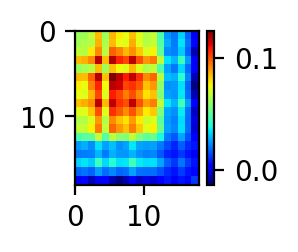

Source range and depth in mtl-unet data set:  tensor([7500.]) tensor([14.])


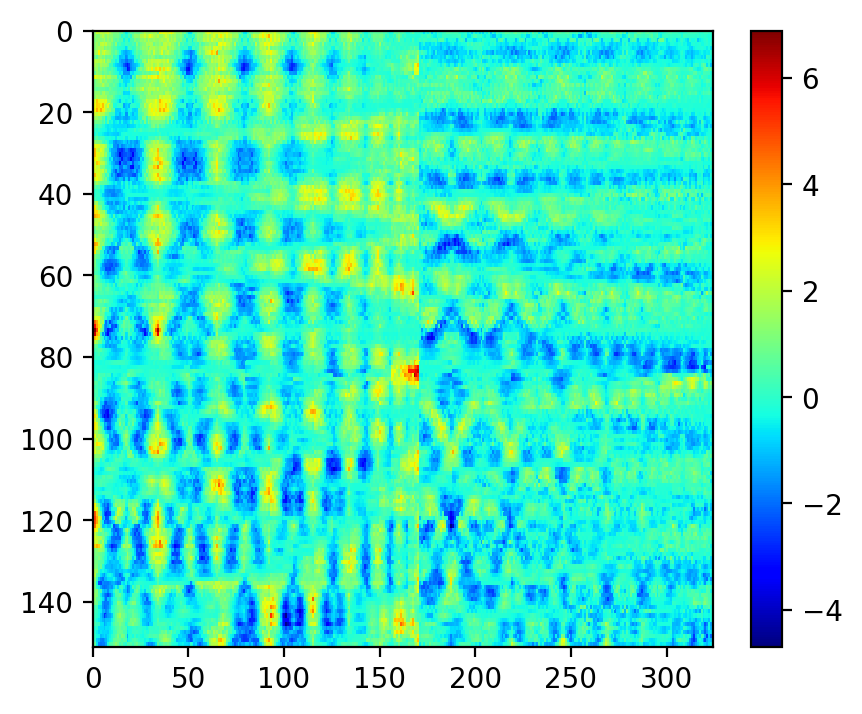

In [3]:
# mtl-cnn
data_train_mtl_cnn = torch.utils.data.DataLoader(dataset_tarin_mtl_cnn, batch_size=1, shuffle=False, num_workers=0, drop_last=True)
_, data_t_mtl_cnn = list(enumerate(data_train_mtl_cnn))[0]
C_train_cnn, r_train_cnn, z_train_cnn = data_t_mtl_cnn['C'], data_t_mtl_cnn['r'], data_t_mtl_cnn['z']  # eg: label -> ('0',) ('1',) It is a tuple.
print('Data size for mtl-cnn: ', C_train_cnn.size())  # type( num is tensor and label[0] is str.)

# Compressed-feture cnns (mtl_unet, xception)
data_train_cf = torch.utils.data.DataLoader(dataset_tarin_cf, batch_size=1, shuffle=False, num_workers=0, drop_last=True)
_, data_t_cf = list(enumerate(data_train_cf))[0]
C_train_cf, r_train_cf, z_train_cf = data_t_cf['C'], data_t_cf['r'], data_t_cf['z']  # eg: label -> ('0',) ('1',) It is a tuple.
print('Data size for mtl-unet: ', C_train_cf.size())  # type( num is tensor and label[0] is str.)

# mtl-cnn plot (only plot channel 0)
print('Source range and depth in mtl-cnn data set: ',r_train_cnn, z_train_cnn)
aa = C_train_cnn[0, 0, :, :].squeeze()
fig = pl.figure(dpi=200, figsize=(1, 1))
h = pl.pcolor(aa, cmap=pl.cm.get_cmap('jet'))
ax = pl.gca()
ax.invert_yaxis()
fig.colorbar(h)
pl.show()

# mtl-unet plot
print('Source range and depth in mtl-unet data set: ',r_train_cf, z_train_cf)
aa = C_train_cf[0, 0, :, :].squeeze()
fig = pl.figure(dpi=200, figsize=(5, 4))
h = pl.pcolor(aa, cmap=pl.cm.get_cmap('jet'))
ax = pl.gca()
ax.invert_yaxis()
fig.colorbar(h)
pl.show()

# 4. Verify the accuracy of reading test set sound source location

In [4]:
# mtl-cnn
data_test_mtl_cnn = torch.utils.data.DataLoader(dataset_test_mtl_cnn, batch_size=1, shuffle=False, num_workers=0, drop_last=True)
_, data_t_mtl_cnn = list(enumerate(data_test_mtl_cnn))[0]
print('Source range and depth in mtl-cnn data set: ', data_t_mtl_cnn['r'], data_t_mtl_cnn['z'])

# Compressed-feture cnns (mtl_unet, xception)
data_test_cf = torch.utils.data.DataLoader(dataset_test_cf, batch_size=1, shuffle=False, num_workers=0, drop_last=True)
_, data_t_cf = list(enumerate(data_test_cf))[0]
print('Source range and depth in mtl-cnn data set: ', data_t_cf['r'], data_t_cf['z'])

Source range and depth in mtl-cnn data set:  tensor([10.]) tensor([10.])
Source range and depth in mtl-cnn data set:  tensor([10.]) tensor([10.])


# 5. Load measured data

Data size for mtl-unet:  torch.Size([1, 302, 18, 18])
Source range and depth in mtl-cnn data set:  tensor([1.]) tensor([5.])


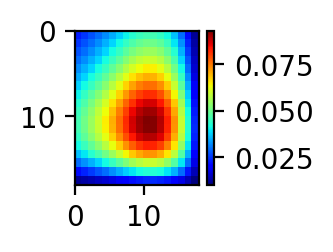

Data size for mtl-unet:  torch.Size([1, 1, 151, 324])
Source range and depth in mtl-cnn data set:  tensor([1.]) tensor([5.])


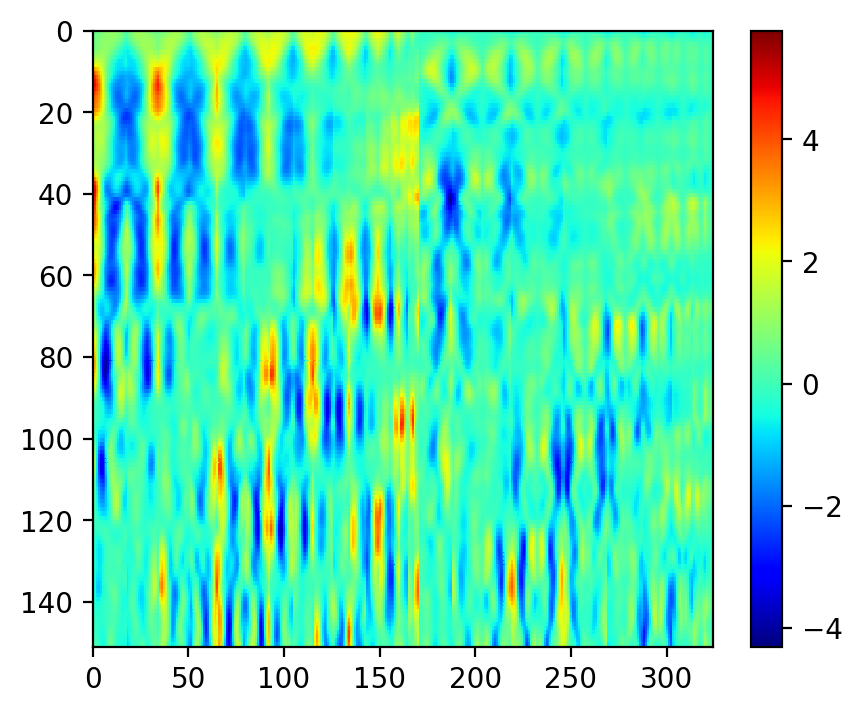

In [5]:
measured_data_path = '../../1.1 Dataset Simulation/1.1.3 Dataset/1.1.3.3 Measured Set/SW_Exp_50-200Hz_1.00-20.00km.sim'
dataset_mea_mtl_cnn = SnSpectrumLoader(file_path=measured_data_path, length_freq=151,
                           SNR_range=[10, 15], Sr=np.array([10]),
                           Sd=np.array([10]), SNR=10, i_file=0, run_mode='exp',
                           model='mtl_cnn')
dataset_mea_cf = SnSpectrumLoader(file_path=measured_data_path, length_freq=151,
                           SNR_range=[10, 15], Sr=np.array([10]),
                           Sd=np.array([10]), SNR=10, i_file=0, run_mode='exp',
                           model='mtl_unet')

# Compressed-feture cnns (mtl_unet, xception)
data_mea_cnn = torch.utils.data.DataLoader(dataset_mea_mtl_cnn, batch_size=1, shuffle=False, num_workers=0, drop_last=True)
_, data_m_cnn = list(enumerate(data_mea_cnn))[0]
C_m_cnn, r_m_cnn, z_m_cnn = data_m_cnn['C'], data_m_cnn['r'], data_m_cnn['z']  # eg: label -> ('0',) ('1',) It is a tuple.
print('Data size for mtl-unet: ', C_m_cnn.size())  # type( num is tensor and label[0] is str.)

# mtl-cnn plot (only plot channel 0)
print('Source range and depth in mtl-cnn data set: ',r_m_cnn, z_m_cnn)
aa = C_m_cnn[0, 0, :, :].squeeze()
fig = pl.figure(dpi=200, figsize=(1, 1))
h = pl.pcolor(aa, cmap=pl.cm.get_cmap('jet'))
ax = pl.gca()
ax.invert_yaxis()
fig.colorbar(h)
pl.show()

# Compressed-feture cnns (mtl_unet, xception)
data_mea_cf = torch.utils.data.DataLoader(dataset_mea_cf, batch_size=1, shuffle=False, num_workers=0, drop_last=True)
_, data_m_cf = list(enumerate(data_mea_cf))[0]
C_m_cf, r_m_cf, z_m_cf = data_m_cf['C'], data_m_cf['r'], data_m_cf['z']  # eg: label -> ('0',) ('1',) It is a tuple.
print('Data size for mtl-unet: ', C_m_cf.size())  # type( num is tensor and label[0] is str.)

# mtl-cnn plot (only plot channel 0)
print('Source range and depth in mtl-cnn data set: ',r_m_cnn, z_m_cnn)
aa = C_m_cf[0, 0, :, :].squeeze()
fig = pl.figure(dpi=200, figsize=(5, 4))
h = pl.pcolor(aa, cmap=pl.cm.get_cmap('jet'))
ax = pl.gca()
ax.invert_yaxis()
fig.colorbar(h)
pl.show()